In [47]:
# let's import some libraries, shall we?

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# fetching the csv's into dataframes

df_clients = pd.read_csv("clients.csv")
df_sales = pd.read_csv("ventes.csv")
df_products = pd.read_csv("produits.csv")

In [13]:
# now it's time to clean them a bit

# let's start by removing duplicates
df_clients = df_clients.drop_duplicates()
df_sales = df_sales.drop_duplicates()
df_products = df_products.drop_duplicates()

# print(df_clients.isnull().sum()
# .sort_values(ascending = False) / len(df_clients))
# print(df_sales.isnull().sum()
# .sort_values(ascending = False) / len(df_sales))
# print(df_products.isnull().sum()
# .sort_values(ascending = False) / len(df_products))

# here was checked whether data was missing or not
# and it confirmed there was no missing data detected

In [20]:
# while there still are negative prices
while int(df_products[['price']].min()) < 0:
    incorrect_price = df_products['price'].argmin()
    df_products = df_products.drop(
        incorrect_price
    ).reset_index(drop = True) # drop it

In [42]:
# importing pre-done stats functions
###
# REMINDER: use list() to convert Series-types
# into, well, lists to use those functions with


def avg(v): # average
    sum = 0
    for i in (v):
        sum += i
    return(sum / len(v))


def var(v): # variance
    diffs = []
    for i in (v): # = SUM of each ((v(i) - avg(v))^2)
        diffs.append((i - avg(v)) ** 2)
    return(avg(diffs)) # = average of above formula


def stdev(v): # spread
    return(var(v) ** 0.5) # square root = ^0.5


def med(v): # median
    v.sort() # better sort the list to find which item is in the middle
    if len(v) % 2 == 1 :
        # if v is of odd length
        median = v[int((len(v) - 1) / 2)] # the item in the middle
    else :
        # if v is of even length
        middle = [v[int((len(v) / 2) - 1)], v[int(len(v) / 2)]]
        median = avg(middle) # the average of the two middle-most items
    return(median)

In [35]:
# gini index


def gini(v):
    v.sort() # getting the list items in order
    n = len(v)      # count
    q = 2 / n       # coefficient
    k = (n + 1) / n # constant
    sum = 0
    wsum = 0        # weighted sum
    for i in range (0, n):
        sum += v[i]
        wsum += (i + 1) * v[i]
    return(q * wsum / sum - k)

In [49]:
# lorenz curve


def lorenz(v):
    v.sort() # getting the list items in order
    sum = 0
    for i in (v):
        sum += i
    csum = 0 # cumulative sum
    curve = [0] # the origin 0 value
    for i in (v):
        csum += i
        curve.append(csum / sum)
    return(curve)

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_6444\3356438481.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


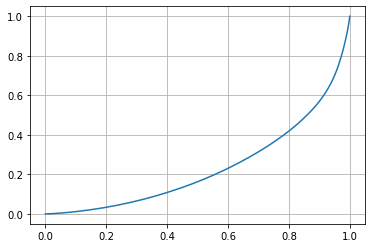

In [50]:
# plotting the lorenz curve of price
pricecurve = lorenz(list(df_products['price']))

# plot
X = np.linspace(0.0, 1.0, len(pricecurve))
Y = pricecurve
   
fig, ax = plt.subplots()
ax.plot(X, Y)
ax.grid()

fig.show()